In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
# load datasets
df = pd.read_csv(r"C:\Users\Charlie\Desktop\Darlytics_Internship Data Analysis\Projects\Python\811685181-loan_data.csv")
newdata = pd.read_csv(r"C:\Users\Charlie\Desktop\Darlytics_Internship Data Analysis\Projects\Python\New_data.csv")  #the new dataset to be predicted

In [3]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1347,360.43,10.434116,22.09,677,6713.041667,13846,71.0,2,0,1,0
1,1,debt_consolidation,0.1324,253.58,11.835009,9.16,662,4298.000000,5122,18.2,2,1,0,0
2,1,debt_consolidation,0.0859,316.11,10.933107,15.49,767,6519.958333,6068,16.7,0,0,0,0
3,1,small_business,0.0714,92.82,11.512925,6.50,747,4384.000000,3021,4.8,0,1,0,0
4,1,debt_consolidation,0.0863,209.54,9.487972,9.73,727,1559.958333,6282,44.6,0,0,0,0


In [4]:
df.shape

(9568, 14)

In [5]:
df.info()  #indicates the summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9568 non-null   int64  
 1   purpose            9568 non-null   object 
 2   int.rate           9568 non-null   float64
 3   installment        9568 non-null   float64
 4   log.annual.inc     9568 non-null   float64
 5   dti                9568 non-null   float64
 6   fico               9568 non-null   int64  
 7   days.with.cr.line  9568 non-null   float64
 8   revol.bal          9568 non-null   int64  
 9   revol.util         9568 non-null   float64
 10  inq.last.6mths     9568 non-null   int64  
 11  delinq.2yrs        9568 non-null   int64  
 12  pub.rec            9568 non-null   int64  
 13  not.fully.paid     9568 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
df.isnull().sum()    # indicate the number of null values

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

## Exploratory Data Analysis (EDA)

<AxesSubplot:xlabel='count', ylabel='purpose'>

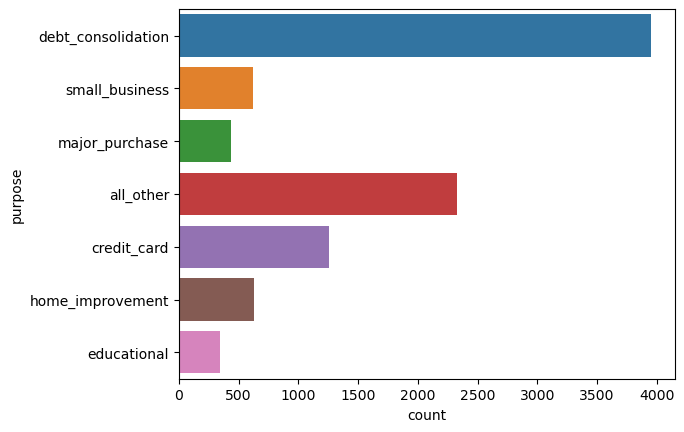

In [7]:
# Graph of purpose of taking the loan
sns.countplot(y='purpose',data=df)

### The above plot shows that 'debt consolidation' majors the purpose of taking the loan.

<AxesSubplot:xlabel='count', ylabel='purpose'>

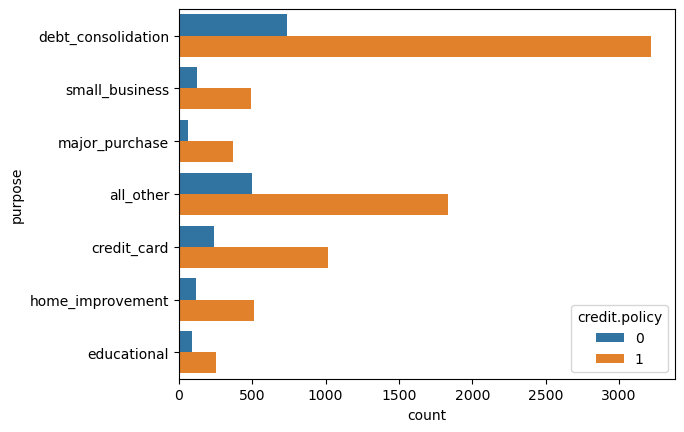

In [8]:
# Graph of purpose of taking the loan wrt credit worthy customers
sns.countplot(y='purpose',hue='credit.policy',data=df)

<AxesSubplot:xlabel='credit.policy', ylabel='count'>

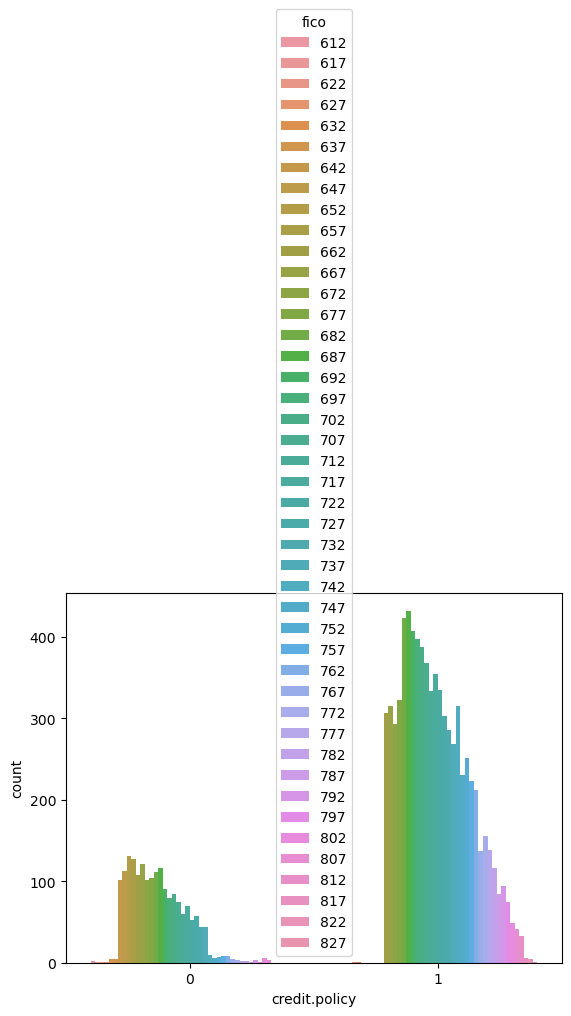

In [9]:
# Graph of the fico score of the borrowers used by the lendingclub
sns.countplot(x='credit.policy',hue='fico',data=df)

<AxesSubplot:xlabel='revol.bal', ylabel='purpose'>

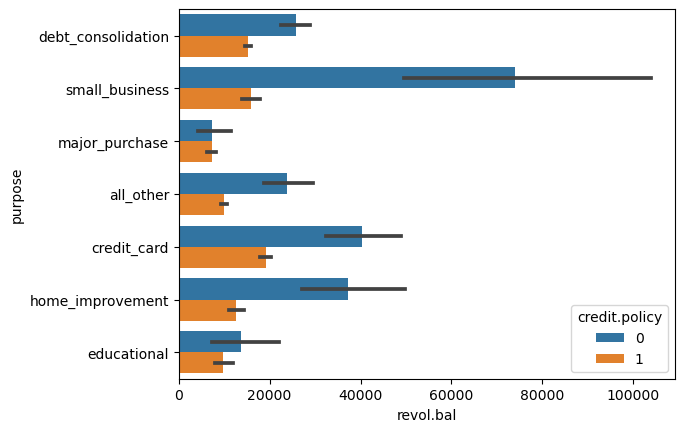

In [10]:
# Graph of the unpaid amount by the borrower at the end of the credit card billing cycle
sns.barplot(x='revol.bal',y='purpose',hue='credit.policy',data=df)

<AxesSubplot:xlabel='delinq.2yrs', ylabel='purpose'>

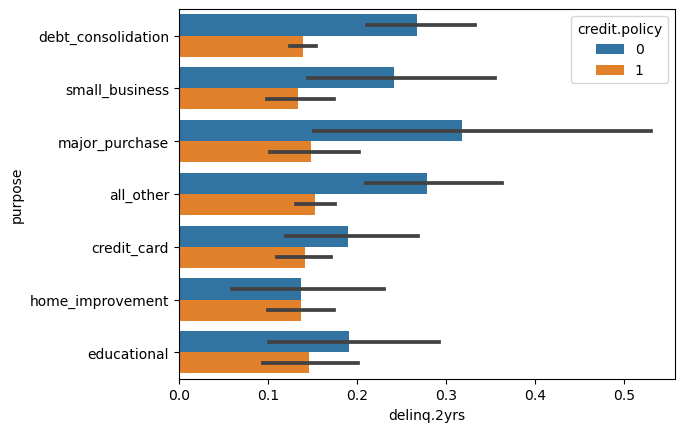

In [11]:
# Graph of number of times the borrower has been 30+ days past due date within last 2years
sns.barplot(x='delinq.2yrs',y='purpose',hue='credit.policy',data=df)

In [12]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1347,360.43,10.434116,22.09,677,6713.041667,13846,71.0,2,0,1,0
1,1,debt_consolidation,0.1324,253.58,11.835009,9.16,662,4298.000000,5122,18.2,2,1,0,0
2,1,debt_consolidation,0.0859,316.11,10.933107,15.49,767,6519.958333,6068,16.7,0,0,0,0
3,1,small_business,0.0714,92.82,11.512925,6.50,747,4384.000000,3021,4.8,0,1,0,0
4,1,debt_consolidation,0.0863,209.54,9.487972,9.73,727,1559.958333,6282,44.6,0,0,0,0


In [13]:
# return a list of categorical column
string_columns = list(df.dtypes[df.dtypes == 'object'].index)

In [14]:
string_columns

['purpose']

In [15]:
df.purpose.value_counts()

debt_consolidation    3952
all_other             2330
credit_card           1259
home_improvement       628
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [16]:
newdata.purpose.value_counts()

debt_consolidation    5
credit_card           3
all_other             1
home_improvement      1
Name: purpose, dtype: int64

### The above shows that the value counts for each category in the 'purpose' column are different for both data (df & newdata). Therefore, the 'purpose' column should be dropped for prediction since 'purpose' is the only string column.


In [17]:
# list of numerical columns
numerical_columns = list(df.dtypes[df.dtypes != 'object'].index)

In [18]:
numerical_columns

['credit.policy',
 'int.rate',
 'installment',
 'log.annual.inc',
 'dti',
 'fico',
 'days.with.cr.line',
 'revol.bal',
 'revol.util',
 'inq.last.6mths',
 'delinq.2yrs',
 'pub.rec',
 'not.fully.paid']

In [19]:
# encode categorical variables
#df_encoded = pd.get_dummies(df, columns=string_columns, drop_first=True)

#df_encoded


In [20]:
df_encoded = pd.get_dummies(df, columns=string_columns, drop_first=True)

In [21]:
df_encoded

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1347,360.43,10.434116,22.09,677,6713.041667,13846,71.0,2,0,1,0,0,1,0,0,0,0
1,1,0.1324,253.58,11.835009,9.16,662,4298.000000,5122,18.2,2,1,0,0,0,1,0,0,0,0
2,1,0.0859,316.11,10.933107,15.49,767,6519.958333,6068,16.7,0,0,0,0,0,1,0,0,0,0
3,1,0.0714,92.82,11.512925,6.50,747,4384.000000,3021,4.8,0,1,0,0,0,0,0,0,0,1
4,1,0.0863,209.54,9.487972,9.73,727,1559.958333,6282,44.6,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9563,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9564,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9565,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9566,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0


In [22]:
df_encoded.shape

(9568, 19)

In [23]:
newdata

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.95833,28854,52.1,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.00000,33623,76.7,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.00000,3511,25.6,1,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.95833,33667,73.2,1,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.00000,4740,39.5,0,1,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.04167,50807,51.0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.04167,3839,76.8,0,0,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.00000,24220,68.6,0,0,0
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.00000,69909,51.1,1,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.04167,5630,23.0,1,0,0


In [24]:
# encode categorical variables
newdata_encoded = pd.get_dummies(newdata, columns=string_columns, drop_first=True)

In [25]:
newdata_encoded

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement
0,1,0.1189,829.10,11.350407,19.48,737,5639.95833,28854,52.1,0,0,0,0,1,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.00000,33623,76.7,0,0,0,1,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.00000,3511,25.6,1,0,0,0,1,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.95833,33667,73.2,1,0,0,0,1,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.00000,4740,39.5,0,1,0,1,0,0
5,1,0.0788,125.13,11.904968,16.98,727,6120.04167,50807,51.0,0,0,0,1,0,0
6,1,0.1496,194.02,10.714418,4.00,667,3180.04167,3839,76.8,0,0,1,0,1,0
7,1,0.1114,131.22,11.002100,11.08,722,5116.00000,24220,68.6,0,0,0,0,0,0
8,1,0.1134,87.19,11.407565,17.25,682,3989.00000,69909,51.1,1,0,0,0,0,1
9,1,0.1221,84.12,10.203592,10.00,707,2730.04167,5630,23.0,1,0,0,0,1,0


In [26]:
newdata_encoded.shape

(10, 15)

### From the above, it can be deduced that after encoding the categorical column ('purpose'), their structures were different for both datasets which makes it difficult for the model to predict for the newdata.

## Model for df

In [27]:
# declare X and y
X = df.drop(['not.fully.paid', 'purpose'], axis=1)  #drop 'purpose' column since it didn't match with the new data 'purpose' column
y = df['not.fully.paid']

In [28]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9563    1
9564    1
9565    1
9566    1
9567    1
Name: not.fully.paid, Length: 9568, dtype: int64

### Using Logistic Regression

In [29]:
# import ML packages

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [30]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [31]:
# create an object for algorithm
model = LogisticRegression()

In [32]:
# train the algorithm with the data
model.fit(X_train, y_train)

LogisticRegression()

In [33]:
# make a prediction
y_pred = model.predict(X_test)

In [34]:
# Accuracy for the model, X_test
print(accuracy_score(y_test, y_pred))

0.8463949843260188


### Predicting the new data (newdata) using the trained model

In [35]:
newdata

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.95833,28854,52.1,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.00000,33623,76.7,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.00000,3511,25.6,1,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.95833,33667,73.2,1,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.00000,4740,39.5,0,1,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.04167,50807,51.0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.04167,3839,76.8,0,0,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.00000,24220,68.6,0,0,0
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.00000,69909,51.1,1,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.04167,5630,23.0,1,0,0


In [36]:
# make a prediction (y_newdata) using the trained model. y_newdata is the prediction whether the 10 individuals from the new data can pay back their loans. 

y_newdata = model.predict(newdata.drop('purpose', axis=1))

In [37]:
y_newdata

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

### From the above, the prediction shows the 10 individuals will not pay back their loans.

### Using Support Vector Machines (SVM)

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an SVM classifier
model = SVC()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Print the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)




Model Accuracy: 0.8463949843260188


In [39]:
# make a prediction (y_newdata) using the trained model. y_newdata is the prediction whether the 10 individuals from the new data can pay back their loans. 

y_newdata = model.predict(newdata.drop('purpose', axis=1))

In [40]:
y_newdata

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

### This still shows that the 10 indivduals will not still pay back their loans'